In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [2]:
pd.read_csv('dados_quarto_dia/movies.csv')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
dados = pd.read_csv('dados_quarto_dia/movies.csv')[['movieId', 'genres']]
dados = dados.set_index('movieId')
dados_dummies = dados['genres'].str.get_dummies()

In [4]:
dados_dummies = dados_dummies.drop(columns='(no genres listed)')

In [5]:
dados_dummies

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
pd.read_csv('dados_quarto_dia/tags.csv')

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
dados_tags = pd.read_csv('dados_quarto_dia/tags.csv')

In [8]:
len(dados_tags['tag'].unique())

1589

In [9]:
len(dados_tags['movieId'].unique())

1572

In [10]:
dados_tags = dados_tags.drop(columns=['userId','timestamp'])

In [11]:
dados_tags = pd.DataFrame({'movieId':dados_tags['movieId'].unique(),
                      'tags':[dados_tags['tag'][dados_tags['movieId']==i].str.cat(sep="|")\
                              for i in dados_tags['movieId'].unique()]})

In [12]:
dados_tags = dados_tags.set_index('movieId')

In [13]:
dados_tags_dummies = dados_tags['tags'].str.get_dummies()

In [14]:
dados_tags_dummies

,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,women,wonderwoman,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
60756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dados_tags_dummies = dados_tags_dummies.rename(columns={n:'tag_'+n for n in dados_tags_dummies.columns})

In [16]:
dados_tags_dummies

,"tag_""artsy""",tag_06 Oscar Nominated Best Movie - Animation,tag_1900s,tag_1920s,tag_1950s,tag_1960s,tag_1970s,tag_1980s,tag_1990s,tag_2001-like,...,tag_women,tag_wonderwoman,tag_workplace,tag_writing,tag_wrongful imprisonment,tag_wry,tag_younger men,tag_zither,tag_zoe kazan,tag_zombies
movieId,,,,,,,,,,,,,,,,,,,,,
60756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dados_dummies.join(dados_tags_dummies)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,tag_women,tag_wonderwoman,tag_workplace,tag_writing,tag_wrongful imprisonment,tag_wry,tag_younger men,tag_zither,tag_zoe kazan,tag_zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,0,1,0,1,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,0,0,1,0,1,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pd.read_csv('dados_quarto_dia/ratings.csv')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [19]:
dados_ratings = pd.read_csv('dados_quarto_dia/ratings.csv')

In [20]:
dados_ratings = dados_ratings.drop(columns=['userId','timestamp'])

In [21]:
dados_ratings = dados_ratings.groupby("movieId").mean()

In [22]:
dados_ratings

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(dados_ratings)

StandardScaler()

In [25]:
dados_ratings['rating'] = scaler.transform(dados_ratings)

In [26]:
dados_ratings

,rating
movieId,
1,0.757025
2,0.194716
3,-0.003257
4,-1.040786
5,-0.219606
...,...
193581,0.847927
193583,0.273102
193585,0.273102


In [27]:
dados_machine_learning = dados_dummies.join(dados_ratings)

In [28]:
dados_machine_learning

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.757025
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.194716
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.003257
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,-1.040786
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.219606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.847927
193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.273102
193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.273102


In [30]:
dados_machine_learning.loc[dados_machine_learning['rating'].isnull(),'rating'] = 0

In [31]:
wcss = []
for i in range(1,81,10):
    kmeans_dados_e = KMeans(n_clusters=i, random_state=1)
    kmeans_dados_e.fit(dados_machine_learning)
    wcss.append(kmeans_dados_e.inertia_)

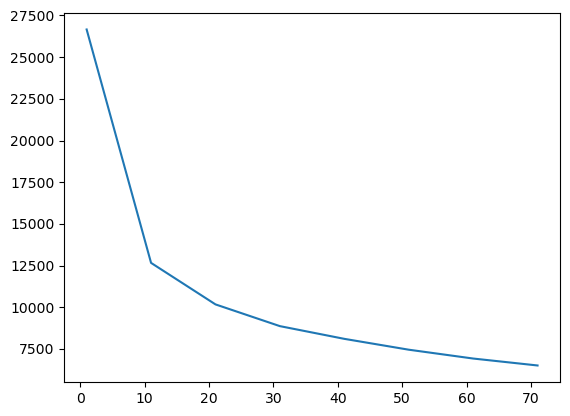

In [32]:
plt.plot(range(1,81,10), wcss)

In [33]:
pca = PCA(n_components=3)

In [34]:
embedding_pca = pca.fit_transform(dados_machine_learning)
projection = pd.DataFrame(columns=['x', 'y', 'z'], data=embedding_pca)

In [35]:
pca.explained_variance_ratio_

array([0.37129908, 0.11963344, 0.10075326])

In [36]:
pca.explained_variance_ratio_.sum()

0.5916857832106306

In [37]:
kmeans_pca = KMeans(n_clusters=20)

kmeans_pca.fit(projection)

projection['cluster_pca'] = kmeans_pca.predict(projection)

In [38]:
projection = projection.join(pd.read_csv('dados_quarto_dia/movies.csv'))
projection = projection.set_index('movieId')

In [39]:
projection

,x,y,z,cluster_pca,title,genres
movieId,,,,,,
1,-0.661957,-1.089136,0.578831,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,-0.142042,-0.246304,0.616478,12,Jumanji (1995),Adventure|Children|Fantasy
3,0.043011,-0.871849,-0.329518,19,Grumpier Old Men (1995),Comedy|Romance
4,0.953863,-0.276013,-1.087751,18,Waiting to Exhale (1995),Comedy|Drama|Romance
5,0.282407,-0.743073,-0.051513,7,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
193581,-0.733423,-0.819444,0.693472,5,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,-0.211881,-0.909934,0.194808,19,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,-0.368712,0.456327,-0.434917,6,Flint (2017),Drama


In [40]:
def recomendador(nome_filme):    
    cluster = list(projection[projection['title'] == nome_filme]['cluster_pca'])[0]
    filmes_recomendados = projection[projection['cluster_pca'] == cluster][['x','y','z','title','genres']]
    x = list(projection[projection['title'] == nome_filme]['x'])[0]
    y = list(projection[projection['title'] == nome_filme]['y'])[0]
    z = list(projection[projection['title'] == nome_filme]['z'])[0]
    distancias = euclidean_distances(filmes_recomendados[['x','y','z']], [[x,y,z]])
    filmes_recomendados['distancias'] = distancias
    return filmes_recomendados.sort_values('distancias').head(10)

In [41]:
recomendador('Grumpier Old Men (1995)')

,x,y,z,title,genres,distancias
movieId,,,,,,
3,0.043011,-0.871849,-0.329518,Grumpier Old Men (1995),Comedy|Romance,0.000000
85565,0.039792,-0.872095,-0.329143,Chalet Girl (2011),Comedy|Romance,0.003249
5957,0.038986,-0.872157,-0.329049,Two Weeks Notice (2002),Comedy|Romance,0.004063
5299,0.035000,-0.872463,-0.328585,My Big Fat Greek Wedding (2002),Comedy|Romance,0.008088
4091,0.053934,-0.871010,-0.330791,Can't Buy Me Love (1987),Comedy|Romance,0.011029
4796,0.053934,-0.871010,-0.330791,"Grass Is Greener, The (1960)",Comedy|Romance,0.011029
5529,0.053934,-0.871010,-0.330791,Serving Sara (2002),Comedy|Romance,0.011029
55245,0.053934,-0.871010,-0.330791,Good Luck Chuck (2007),Comedy|Romance,0.011029
276,0.053934,-0.871010,-0.330791,Milk Money (1994),Comedy|Romance,0.011029


In [42]:
recomendador('Father of the Bride Part II (1995)')

,x,y,z,title,genres,distancias
movieId,,,,,,
5,0.282407,-0.743073,-0.051513,Father of the Bride Part II (1995),Comedy,0.000000e+00
2829,0.282407,-0.743073,-0.051513,"Muse, The (1999)",Comedy,1.490116e-08
830,0.282407,-0.743073,-0.051513,"First Wives Club, The (1996)",Comedy,1.490116e-08
2060,0.282407,-0.743073,-0.051513,BASEketball (1998),Comedy,1.490116e-08
3968,0.279402,-0.743304,-0.051163,Bedazzled (2000),Comedy,3.034429e-03
4718,0.287816,-0.742658,-0.052144,American Pie 2 (2001),Comedy,5.461972e-03
1020,0.271442,-0.743915,-0.050235,Cool Runnings (1993),Comedy,1.107156e-02
6287,0.296726,-0.741974,-0.053182,Anger Management (2003),Comedy,1.445816e-02
3617,0.266574,-0.744288,-0.049668,Road Trip (2000),Comedy,1.598626e-02
